# Pymaceuticals Inc.
---

### Analysis
Looking at the analysis generated, we can observe a few conclusions. One of the most obvious, tumor volume increases with subject weight, is very clearly shown on the scatter plot and its linear regression model depicted below. The correlation coefficient was calculated to be 0.84, nearly 1.0, which suggests a strong dependence.

Selecting a few drug treatments to run an analysis on, we can also observe that of the four, two of them, Capomulin and Ramicane, were more effective, with tumor volumes almost half the size as those subjects on Infubinol and Ceftamin. This is shown by the boxplot generated below. However, it should also be noted that both of these more effective drugs, Capomulin and Ramicane, had the most observed timepoints observed out of all the drug treatments.

When a single mouse was selected to observe tumor volume per timepoint, we can see that volume actually lessened over time with sharp droppoints (most likely by the administrations of the drug treatment), but began to rise again. If we were to chart similar graphs for all mice, perhaps we might see similar results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import math

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(mouse_data_complete["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete[mouse_data_complete[["Mouse ID", "Timepoint"]].duplicated()==True]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_data_complete[(mouse_data_complete["Mouse ID"] == "g989")]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_complete = mouse_data_complete[mouse_data_complete['Mouse ID'] != "g989"]
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_cleaned = len(mouse_data_complete["Mouse ID"].unique())
mice_count_cleaned

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_stdev = mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_stderr = mouse_data_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

drug_statistics_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
                                   "Median Tumor Volume":median_tumor_volume,
                                   "Tumor Volume Variance":tumor_volume_variance,
                                   "Tumor Volume Std. Dev.":tumor_volume_stdev,
                                   "Tumor Volume Std. Err.":tumor_volume_stderr})
drug_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_statistics_df = mouse_data_complete.groupby('Drug Regimen').aggregate({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
drug_statistics_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

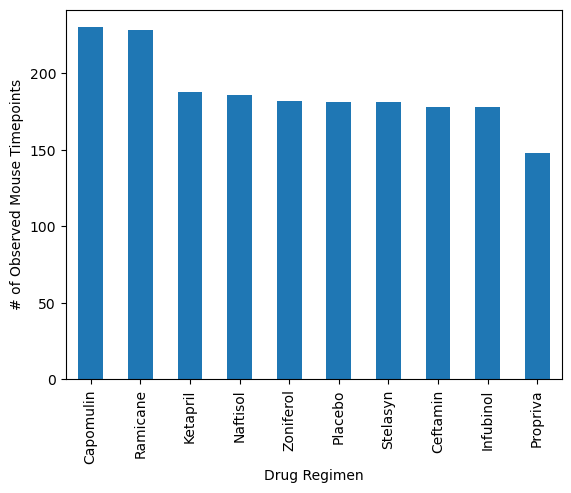

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = mouse_data_complete.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
timepoints_chart = mouse_timepoints.plot(kind="bar")
timepoints_chart.set_xlabel("Drug Regimen")
timepoints_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

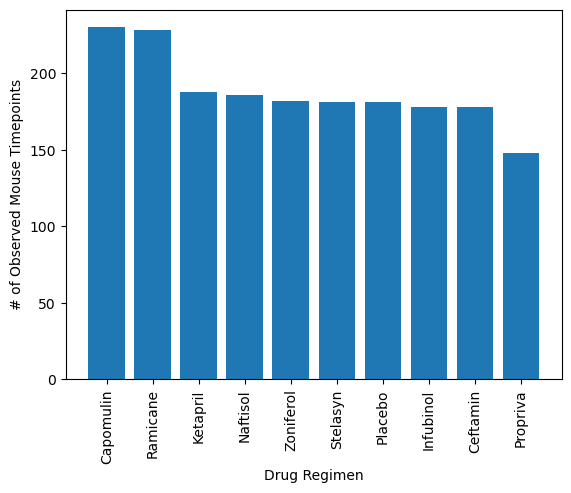

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints = mouse_data_complete["Drug Regimen"].value_counts()
plt.bar(timepoints.index, timepoints.values)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

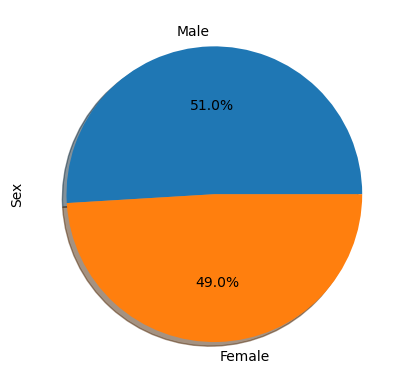

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = mouse_data_complete["Sex"].value_counts()
male_female.plot(kind="pie", autopct="%1.1f%%", shadow=True)
plt.show()

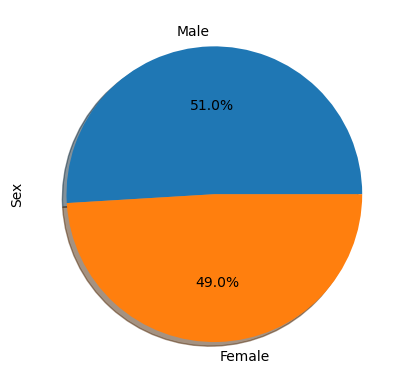

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = mouse_data_complete["Sex"].value_counts()
labels = ["Male", "Female"]
sizes = male_female
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_data_complete.groupby("Mouse ID")
timepoint_max = greatest_timepoint['Timepoint'].max()

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_filtered = pd.merge(timepoint_max, mouse_data_complete, on=["Mouse ID", "Timepoint"], how="left")
greatest_timepoint_filtered

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug:
    final_vol = greatest_timepoint_filtered.loc[greatest_timepoint_filtered["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # add subset
    tumor_vol_data.append(final_vol)
   
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} are outliers for {drug}.")
    print(f"Values above {upper_bound} are outliers for {drug}.")

Values below 20.70456164999999 are outliers for Capomulin.
Values above 51.83201549 are outliers for Capomulin.
Values below 17.912664470000003 are outliers for Ramicane.
Values above 54.30681135 are outliers for Ramicane.
Values below 36.83290494999999 are outliers for Infubinol.
Values above 82.74144559000001 are outliers for Infubinol.
Values below 25.355449580000002 are outliers for Ceftamin.
Values above 87.66645829999999 are outliers for Ceftamin.


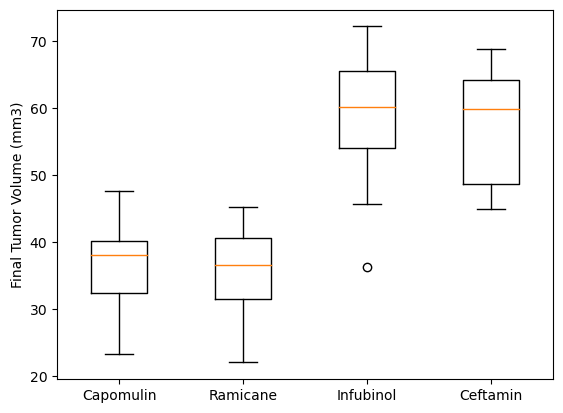

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

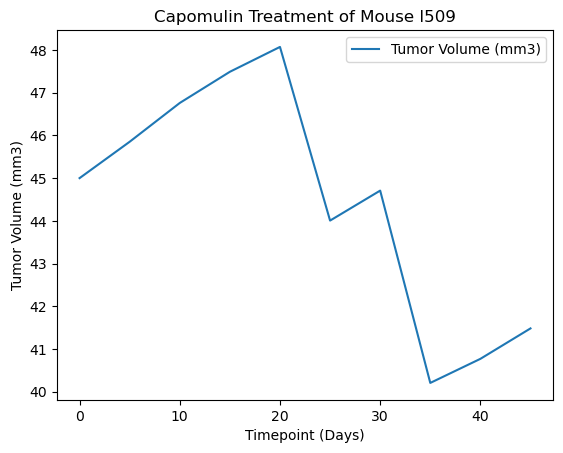

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_capomulin = mouse_data_complete.loc[mouse_data_complete["Mouse ID"]=="l509"]
single_capomulin_df = single_capomulin[["Timepoint", "Tumor Volume (mm3)"]]
single_capomulin_df.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

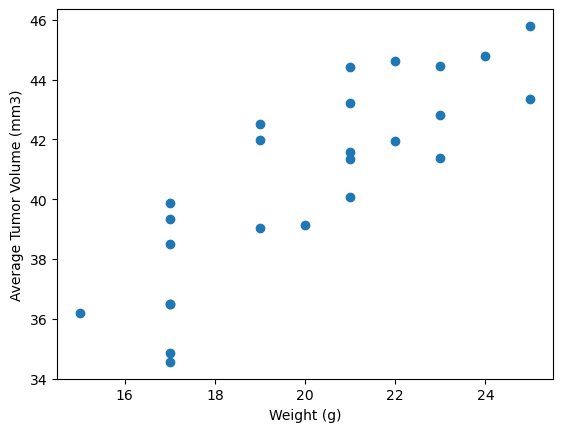

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_data_complete[(mouse_data_complete["Drug Regimen"] == "Capomulin")]
capomulin_weight = capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
capomulin_volume = capomulin.groupby(["Mouse ID"])["Weight (g)"].unique()
capomulin_df = pd.merge(capomulin_weight, capomulin_volume, on="Mouse ID")
capomulin_df["Weight (g)"] = capomulin_df["Weight (g)"].astype(float)
capomulin_df

plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


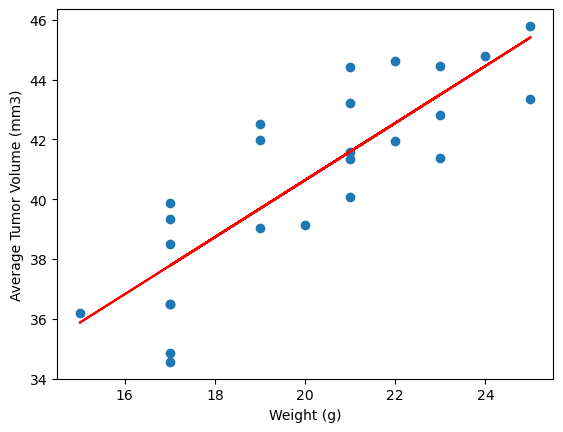

In [18]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_data_complete[(mouse_data_complete["Drug Regimen"] == "Capomulin")]
capomulin_weight = capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
capomulin_volume = capomulin.groupby(["Mouse ID"])["Weight (g)"].unique()
capomulin_df = pd.merge(capomulin_weight, capomulin_volume, on="Mouse ID")
capomulin_df["Weight (g)"] = capomulin_df["Weight (g)"].astype(float)

x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and average tumor volume is {round(st.pearsonr(x_values, y_values)[0],2)}")
plt.show()